# T-SNE

Since t-distributed stochastic neighbor embeddings sounds too scary for most people (and no one can remember that name) the clustering algorithm is abbreviated into t-SNE. And in this notebook, I try to understand it better.


Application:
- effective method to reduce high dimensional data
- visualizing high dimensional patterns
- introduced by van der Maaten and Hinton(2008)

Sources:
- 1) https://distill.pub/2016/misread-tsne/
- 2) https://afiodorov.github.io/2019/05/27/tsne/
- 3) https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/
- 4) van der Maaten and Hinton(2008)

t-SNE is used to make complex data structures more tangible. Datasets consist often of more than 3 dimensions which makes it hard to understand and visualize. Applied on the MNIST-dataset of handwritten letters it can create insightful visualizations like 

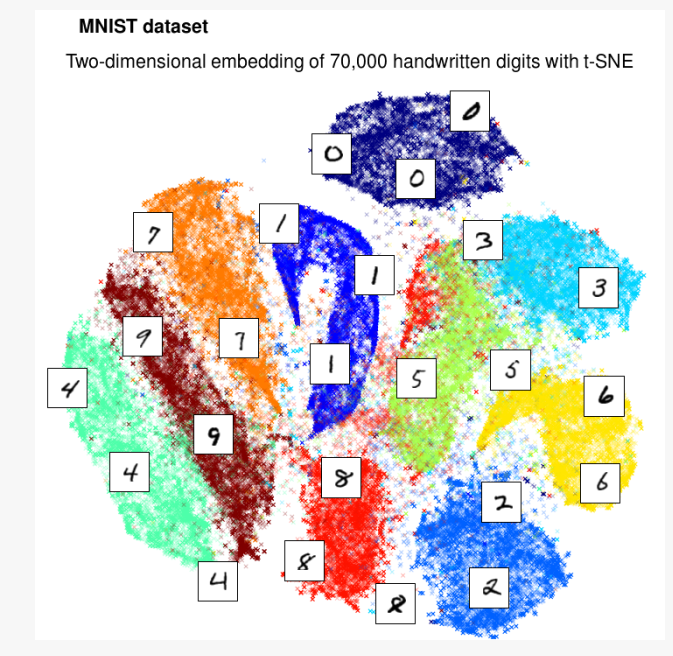



from data inputs such as (stylized):


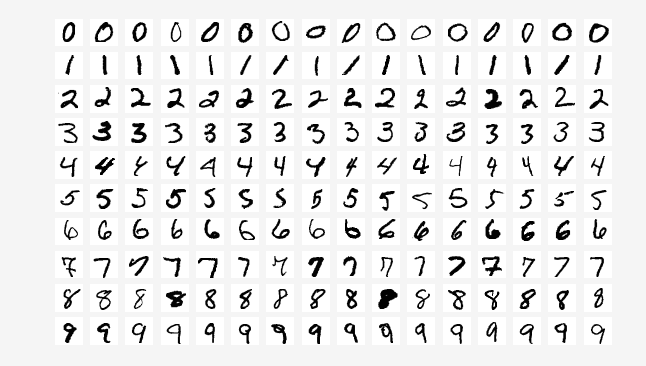



Therefore, t-SNE can uncover hidden structure from high-dimensional data automatically and is therefore a unsupervised learning technique.


### Math

Let's quickly outline the math behind it before looking into the sklearn implementation.

The algorithm takes a set of points in high-diemnsional space and finds a suitable representation in lower-dimensional space. The transformation is non-linear and adapts to the underlying data. Thus, the transformation may differ across different regions.

Hyperparameter:

- Perplexity: Balances "attention" between local and global aspects. It can be thought of a guess of close instances around a specific value. The original authors suggest values between 5 and 50.

Tuning the perplexity is complex since the algorithm does not always produce similar results and increments in perplexity may produce largly different visualizations. Source 1) provides excellent visualizations of how perplexity influences the results. 


Algorithm:

- Step 1: Measure distances
- Step 2: Scale distances
- Step 3: Average similarity scores
- Step 4: Randomly project data to low dimension
- Step 5: Measure distance using t-distribution(fatter tails than gausian)
- Step 6: Iterate through t-distances and slightly push values to resemble scores from step 3)


Why is a t-distribution used here? Clusters would clump more and classification would be harder.





In [1]:
# import required libraries
import numpy as np

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 37

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [2]:
digits = load_digits()
digits.data.shape # the data set contains handwritten digit images with 8*8 = 64 pixels

(1797, 64)

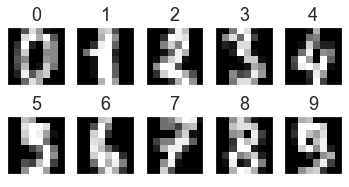

In [3]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [4]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [5]:
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [6]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("colorblind", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit based on the median of each cluster
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

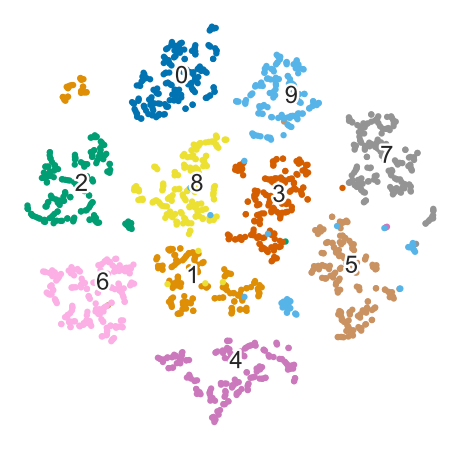

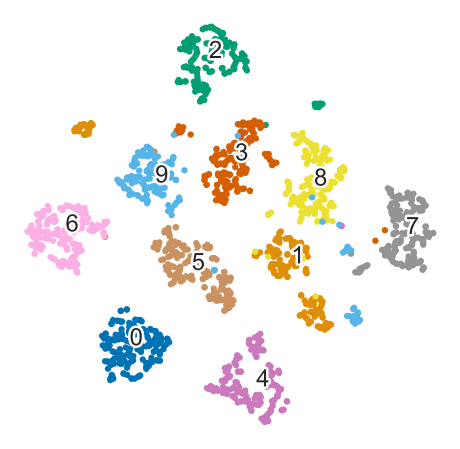

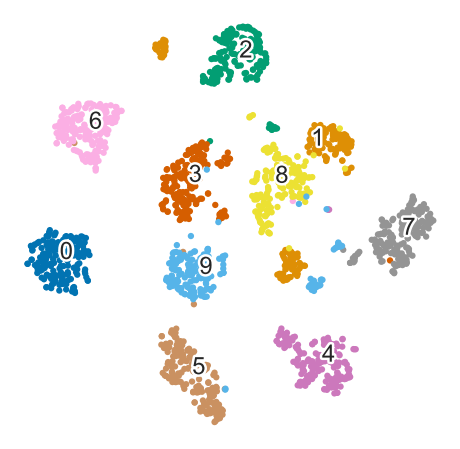

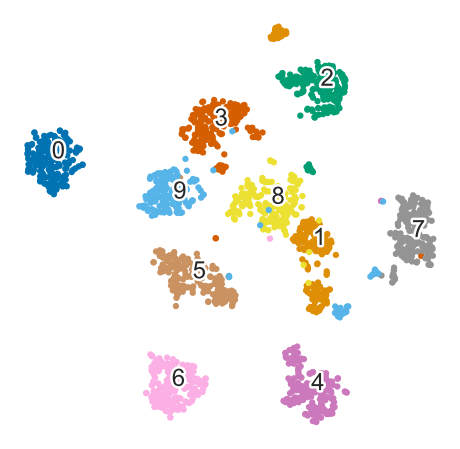

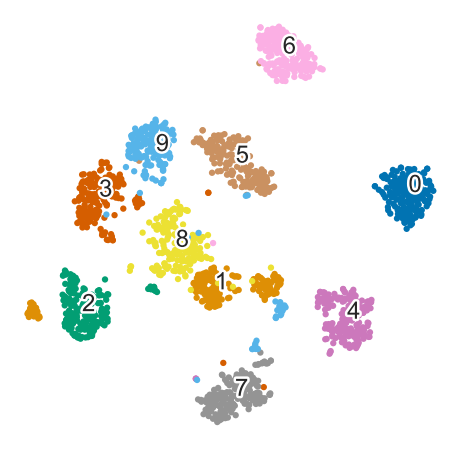

In [7]:
perplexity = [5,10,20,30,50] # set different perplexity values
for i in perplexity:
    digits_proj = TSNE(perplexity=i,
                       random_state=RS).fit_transform(X)
    scatter(digits_proj, y)